# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q3.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: CIFAR-10 (small version)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow.keras.datasets.cifar10 as cifar10

(X1,y1),(X2,y2)=cifar10.load_data()
y1=y1.squeeze()
y2=y2.squeeze()


# Question 1: 
## a) Select for training a subset of 20000 images from the matrix X1. Make sure that there are 2000 examples per class and that this new training data is shuffled. Also make shure that the test set (matrix X2) is ordered per class.
## b) Use generators for training and validation as specified in the cell below. Build a test generator. Make sure that this generator does not shuffle the data. Use this generator to go through the test set and retreive the class of the examples in it. Plot the class of the 10000 examples in the test set.
## c) Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
### - Use 6 convolutional layers
### - Use 3 pooling layers
##  Build this network, compile and train the network using the  training and validation generators. Make sure to go through the whole training and validation sets in each epoch. Plot the  the losses and the accuracies curves for the training and validation sets during the training process. Train the network for 25 epochs.  Comment the results. 
## d) Use the test generator to obtain the confusion matrix and the total number of erros in the test set.

## 1.a)

In [26]:

indices = []
for class_label in range(10):
    class_indices = np.where(y1 == class_label)[0]
    np.random.shuffle(class_indices)
    indices.extend(class_indices[:2000])
np.random.shuffle(indices)
X_train = X1[indices]
y_train = y1[indices]


# Shuffle the training data
shuffle_indices = np.arange(len(X_train))
np.random.shuffle(shuffle_indices)
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]


test_order = np.argsort(y2)
X_test = X2[test_order]
y_test = y2[test_order]
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (20000, 32, 32, 3) (20000,)
Test set shape: (10000, 32, 32, 3) (10000,)


## 1.b)

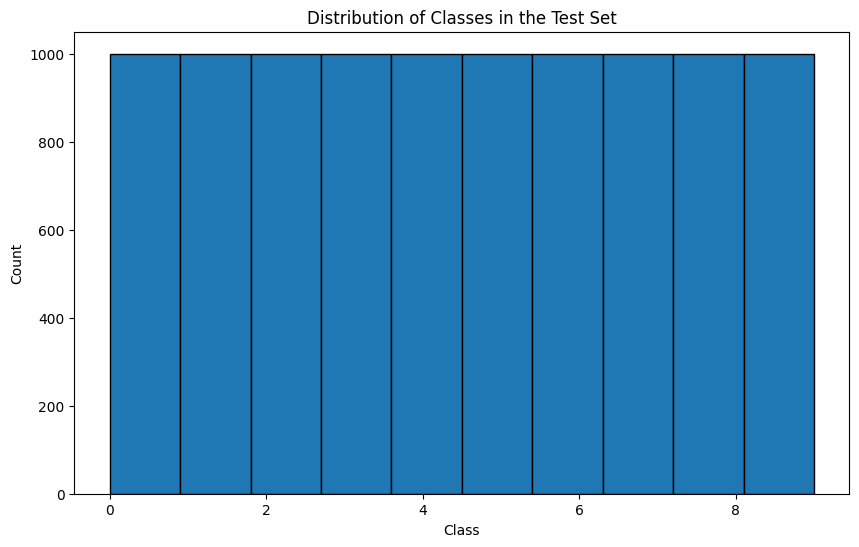

In [27]:
Y1=keras.utils.to_categorical(y_train)
Y2=keras.utils.to_categorical(y_test)


# X1 = np.array([tf.image.resize(img, (32, 32)) for img in X_train])
# print("Resized X1 shape:", X1.shape)



dataGen=ImageDataGenerator(rescale=1./255,validation_split=.25)
trainGen=dataGen.flow(X_train,Y1,batch_size=300,subset='training')
validGen=dataGen.flow(X_train,Y1,batch_size=100,subset='validation')
#testGen = ImageDataGenerator(rescale=1./255).flow(X_test, shuffle=False, batch_size=1)
testGen=ImageDataGenerator(rescale=1./255)
testGen=testGen.flow(X_test,y_test,batch_size=1000,shuffle=False)


# import time


test_steps = len(testGen)
test_classes = []
for _ in range(test_steps):
    images, labels = testGen.next()
    test_classes.extend(labels)

# Plot the class of the 10000 examples in the test set
plt.figure(figsize=(10, 6))
plt.hist(test_classes, bins=10, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Test Set')
# plt.xticks(range(num_classes))
plt.show()


## 1.c)

In [28]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(keras.layers.Conv2D(8, (3, 3), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(keras.layers.Conv2D(32, (1, 1), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(16, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))
cnn.summary()



cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# best_model = keras.callbacks.ModelCheckpoint('cnn_ex1.h5', monitor='val_loss', save_best_only=True)
cnn_train = cnn.fit(trainGen, epochs=25, validation_data=validGen)
# load model
#cnn = keras.models.load_model('cnn_ex1.h5')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 8)         224       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 8)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 16)        1168      
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2320      
                                                                 
 average_pooling2d_4 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                          

2023-05-18 20:19:01.246136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 2.2763 - accuracy: 0.1263

2023-05-18 20:19:06.980494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 7s 99ms/step - loss: 2.2763 - accuracy: 0.1263 - val_loss: 2.2379 - val_accuracy: 0.1650
Epoch 2/25
50/50 [==============================] - 3s 61ms/step - loss: 2.1406 - accuracy: 0.2127 - val_loss: 2.0438 - val_accuracy: 0.2574
Epoch 3/25
50/50 [==============================] - 4s 73ms/step - loss: 1.9974 - accuracy: 0.2745 - val_loss: 1.9394 - val_accuracy: 0.2954
Epoch 4/25
50/50 [==============================] - 4s 73ms/step - loss: 1.9047 - accuracy: 0.3061 - val_loss: 1.8951 - val_accuracy: 0.3082
Epoch 5/25
50/50 [==============================] - 3s 64ms/step - loss: 1.8670 - accuracy: 0.3210 - val_loss: 1.9215 - val_accuracy: 0.3124
Epoch 6/25
50/50 [==============================] - 3s 57ms/step - loss: 1.8321 - accuracy: 0.3377 - val_loss: 1.8146 - val_accuracy: 0.3414
Epoch 7/25
50/50 [==============================] - 3s 57ms/step - loss: 1.7968 - accuracy: 0.3463 - val_loss: 1.7805 - val_accuracy: 0.3582
Epoch 8/25
50/50 [======

In [ ]:
# Plot training & validation accuracy values and loss values
plt.figure(figsize=(10, 5))

# Plot accuracy curves
plt.plot(cnn_train.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_train.history['val_accuracy'], label='Validation Accuracy')

# Plot loss curves
plt.plot(cnn_train.history['loss'], label='Training Loss')
plt.plot(cnn_train.history['val_loss'], label='Validation Loss')

plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.show()

## 1.d)

In [ ]:
from sklearn.metrics import confusion_matrix
cnn_y_pred = cnn.predict(testGen)
cnn_y_pred = np.argmax(cnn_y_pred, axis=1)

cnn_cm = confusion_matrix(Y2, cnn_y_pred)
print(cnn_cm)
print('Total number of errors: ', np.sum(Y2 != cnn_y_pred))
print('Accuracy: ', np.sum(y2 == cnn_y_pred) / y2.shape[0] * 100)

# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the problem. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Define new generators (for training, validation and testing) so that they perform the correct pre-process of he data so it can be used by the network. 
### c)  Train the network for 25 epochs and show the results. Print the confusion matrix and the total number of errors in the test set. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow.keras.datasets.cifar10 as cifar10
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

(X1,y1),(X2,y2)=cifar10.load_data()
y1=y1.squeeze()
y2=y2.squeeze()


## 2.a)

In [11]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


## 2.b)

In [13]:
# PRE-PROCESS 
X1 = preprocess_input(X1)
X2 = preprocess_input(X2)

In [14]:
dataGen=ImageDataGenerator(rescale=1./255,validation_split=.25)
trainGen=dataGen.flow(X1,y1,batch_size=300,subset='training')
validGen=dataGen.flow(X1,y1,batch_size=100,subset='validation')
testGen = ImageDataGenerator(rescale=1./255).flow(X2, shuffle=False, batch_size=1)

## 2.c)

In [15]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# best_model = keras.callbacks.ModelCheckpoint('ex2_bm.h5', monitor='val_loss', save_best_only=True)
model_train = model.fit(trainGen, epochs=25, validation_data=testGen)
#model = keras.models.load_model('ex2_bm.h5')

Epoch 1/25


2023-05-18 19:34:06.882371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 2.3014 - accuracy: 0.1126

2023-05-18 19:34:21.404490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 40s 297ms/step - loss: 2.3014 - accuracy: 0.1126 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/25
125/125 [==============================] - 39s 310ms/step - loss: 2.2986 - accuracy: 0.1315 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/25
125/125 [==============================] - 37s 296ms/step - loss: 2.2963 - accuracy: 0.1445 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/25
125/125 [==============================] - 41s 332ms/step - loss: 2.2940 - accuracy: 0.1476 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/25
125/125 [==============================] - 38s 304ms/step - loss: 2.2917 - accuracy: 0.1594 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/25
125/125 [==============================] - 45s 359ms/step - loss: 2.2896 - accuracy: 0.1581 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/25
125/125 [==============================] - 36s 288ms/step - loss: 2.2874 - accurac

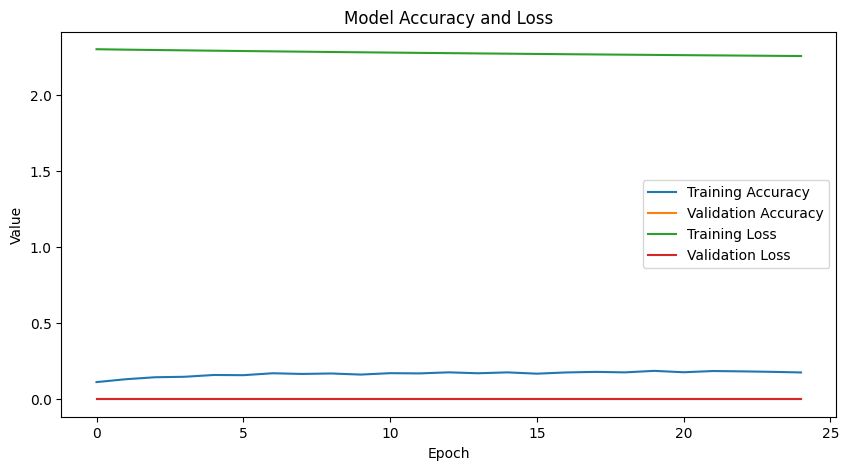

In [16]:
# Plot training & validation accuracy values and loss values
plt.figure(figsize=(10, 5))

# Plot accuracy curves
plt.plot(model_train.history['accuracy'], label='Training Accuracy')
plt.plot(model_train.history['val_accuracy'], label='Validation Accuracy')

# Plot loss curves
plt.plot(model_train.history['loss'], label='Training Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')

plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.show()

In [17]:
model_y_pred = model.predict(X2)
model_y_pred = np.argmax(model_y_pred, axis=1)

model_cm = confusion_matrix(y2, model_y_pred)
print(model_cm)
print('Total number of errors: ', np.sum(y2 != model_y_pred))
print('Accuracy: ', np.sum(y2 == model_y_pred) / y2.shape[0] * 100)

2023-05-18 19:50:21.729901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 10s 25ms/step
[[  7  39  27   3   0 837  30  17   1  39]
 [  8  22   8   2   2 920   6  14   0  18]
 [  3  28   5   4   0 908  13  15   1  23]
 [  3  10   4   4   1 956   8  10   0   4]
 [  0  11   6   6   0 947   5  15   1   9]
 [  0   7   5   7   0 958  10  12   0   1]
 [  2  10   8   3   0 935  12  16   0  14]
 [  0  19  15   5   1 924  14  10   1  11]
 [  3  47  11   6   0 890  18   7   0  18]
 [  4  22   5   9   0 936   3  12   0   9]]
Total number of errors:  8973
Accuracy:  10.27
